In [0]:
from keras.datasets import fashion_mnist, mnist
from sklearn import datasets
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd 
import numpy as np
import keras

Using TensorFlow backend.


#Task 2 [35 Points]
Train a multilayer perceptron (fully connected) on the Fashion MNIST dataset using the
traditional train/test split as given by fashion_mnist.load_data in keras. Use a separate 10000
samples (from the training set) for model selection and to compute learning curves (accuracy
vs epochs, not accuracy vs n_samples). Compare a “vanilla” model with a model using
drop-out and evaluate if using drop-out allows you to learn a bigger network. Then, compare to
a model using batch normalization. Visualize learning curves for all models.

In [0]:
#checked that fashion mnist has same image size and structure of mnist 

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() #first split
X_train = X_train.reshape(60000, 784) #doing the formatting as in the lecture
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 10000, random_state = 0, stratify = y_train_val)
#getting a validation set of 10000 - we use the validation splitting below instead 

#scaling of data 
X_train /= 255
X_test /= 255

num_classes = 10 #checked that fashion mnist has 10 classes 
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

4423680/4422102 [==============================] - 2s 1us/step


In [0]:
y_train.shape 

(60000, 10)

Interesting link about how to choose the number of neurons https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

In [0]:
#building a vanilla model     

model = Sequential([
    Dense(38, input_shape=(784,), activation='relu'), 
    Dense(10, activation='softmax')])

model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_callback = model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=2, validation_split = 1/6) #using 10000 for validation 
score = model.evaluate(X_test, y_test)
print("Validation loss: {:.3f}".format(score[0])) 
print("Validation Accuracy: {:.3f}".format(score[1]))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 3s - loss: 0.6926 - accuracy: 0.7734 - val_loss: 0.5084 - val_accuracy: 0.8268
Epoch 2/50
 - 1s - loss: 0.4658 - accuracy: 0.8408 - val_loss: 0.4519 - val_accuracy: 0.8441
Epoch 3/50
 - 1s - loss: 0.4260 - accuracy: 0.8533 - val_loss: 0.4338 - val_accuracy: 0.8505
Epoch 4/50
 - 1s - loss: 0.4029 - accuracy: 0.8595 - val_loss: 0.4181 - val_accuracy: 0.8545
Epoch 5/50
 - 1s - loss: 0.3876 - accuracy: 0.8641 - val_loss: 0.4078 - val_accuracy: 0.8561
Epoch 6/50
 - 1s - loss: 0.3726 - accuracy: 0.8694 - val_loss: 0.3924 - val_accuracy: 0.8618
Epoch 7/50
 - 1s - loss: 0.3595 - accuracy: 0.8732 - val_loss: 0.3956 - val_accuracy: 0.8624
Epoch 8/50
 - 1s - loss: 0.3504 - accuracy: 0.8774 - val_loss: 0.3765 - val_accuracy: 0.8700
Epoch 9/50
 - 1s - loss: 0.3423 - accuracy: 0.8799 - val_loss: 0.3903 - val_accuracy: 0.8600
Epoch 10/50
 - 1s - loss: 0.3350 - accuracy: 0.8813 - val_loss: 0.3699 - val_accuracy: 0.8678
Epoch 11/50
 - 1s -

In [0]:
def plot_history(logger, title): #function for plotting learning curve
    df = pd.DataFrame(logger.history)
    df[['accuracy', 'val_accuracy']].plot()
    plt.title(title)
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
    plt.ylabel("loss")
 

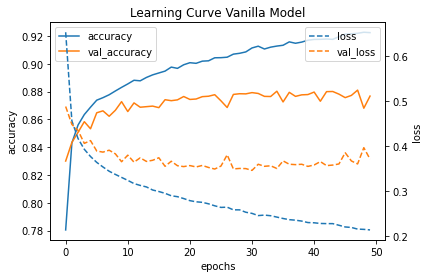

In [0]:
plot_history(history_callback, "Learning Curve Vanilla Model") #could run longer? accuracy not yet stabilised? or is that the point? 

In [0]:
#Now trying a model with drop out 
from keras.layers import Dropout

model_dropout = Sequential([
   Dense(38, input_shape=(784,), activation='relu'),
   Dropout(.5),
   Dense(10, activation='softmax'), 
])
model_dropout.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, batch_size=128,
                            epochs=50, verbose=1, validation_split=1/6)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.9482 - accuracy: 0.6677 - val_loss: 0.5370 - val_accuracy: 0.8120
Epoch 2/50
50000/50000 [==============================] - 2s 36us/step - loss: 0.6622 - accuracy: 0.7688 - val_loss: 0.4840 - val_accuracy: 0.8269
Epoch 3/50
50000/50000 [==============================] - 2s 36us/step - loss: 0.6027 - accuracy: 0.7889 - val_loss: 0.4499 - val_accuracy: 0.8339
Epoch 4/50
50000/50000 [==============================] - 2s 36us/step - loss: 0.5693 - accuracy: 0.7998 - val_loss: 0.4266 - val_accuracy: 0.8458
Epoch 5/50
50000/50000 [==============================] - 2s 36us/step - loss: 0.5536 - accuracy: 0.8037 - val_loss: 0.4179 - val_accuracy: 0.8524
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.5400 - accuracy: 0.8070 - val_loss: 0.4142 - val_accuracy: 0.8473
Epoch 7/50
50000/50000 [==============================] - 2s 37us/st

In [0]:
score = model_dropout.evaluate(X_test, y_test, verbose=0)
score

[0.4001912536382675, 0.8636000156402588]

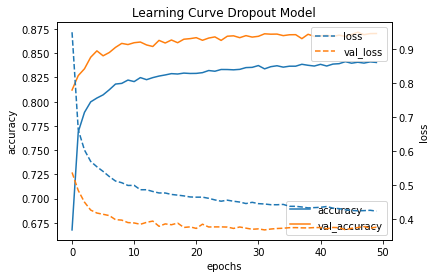

In [0]:
plot_history(history_dropout, "Learning Curve Dropout Model") 

From the graphs we can see that the model without dropout actually had higher accuracy score on average with lower loss than the model with dropout if all things are kept the same, probably because dropout prevents overfitting. This allows the model to learn larger networks without overfitting as much. 

In [0]:
#Adding batch normalisation to the vanilla model 
from keras.layers import BatchNormalization
model_bn = Sequential([ 
    Dense(38, input_shape=(784,)),
    BatchNormalization(),
    Activation("relu"),
    Dense(10, activation='softmax')
])
model_bn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_bn = model_bn.fit(X_train, y_train, batch_size=128,
                            epochs=50, verbose=1, validation_split=1/6)


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.6277 - accuracy: 0.8039 - val_loss: 0.4583 - val_accuracy: 0.8437
Epoch 2/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.4099 - accuracy: 0.8590 - val_loss: 0.4081 - val_accuracy: 0.8552
Epoch 3/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.3702 - accuracy: 0.8694 - val_loss: 0.4032 - val_accuracy: 0.8581
Epoch 4/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.3441 - accuracy: 0.8776 - val_loss: 0.3719 - val_accuracy: 0.8683
Epoch 5/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.3251 - accuracy: 0.8844 - val_loss: 0.3766 - val_accuracy: 0.8634
Epoch 6/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.3106 - accuracy: 0.8877 - val_loss: 0.3995 - val_accuracy: 0.8590
Epoch 7/50
50000/50000 [==============================] - 2s 43us/st

In [0]:
score = model_bn.evaluate(X_test, y_test, verbose=0)
score

[0.5240932049036026, 0.8551999926567078]

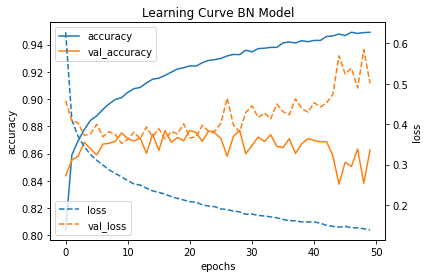

In [0]:
plot_history(history_bn, "Learning Curve BN Model") 

The model with batch normalisation performed better (had the highest train accuracy in the last epoch) than the model with dropout, however the validation accuracy and loss are more unstable. BN allows for faster learning rate.